<a href="https://colab.research.google.com/github/aidpod/ml_regression/blob/main/LinearRegression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression for Prediction Task


Predicting Housing Prices for regions in the USA. 

The data contains the following columns:


* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house





# Loading Packages & Data

In [ ]:
# Load all the libraries neededfor the lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline


In [ ]:
# Import the data from GitHub repository
url = "https://raw.githubusercontent.com/aidpod/ml_regression/main/USA_Housing.csv"
data = pd.read_csv(url, sep = ",")

# Exploratory Data Analysis

In [ ]:
# Print/Output the first 5 lines of the dataset
data.head()

In [ ]:
# Checking for Null Values
#data.info()
data.isnull().sum()

In [ ]:
# Getting the summaries info about the columns in the dataset
##################

In [ ]:
# Dropping 'Address' Column
data.drop(['Address'],axis=1,inplace=True)

In [ ]:
# Plot a pairs plot of all variables in our dataframe
sns.pairplot(data)

In [ ]:
# Output a heatmap of the correlation matrix
##########################
##########################

In [ ]:
#Output a list of 'Price' corrolation values sorted from highest to lowest
data.corr().Price.sort_values(ascending=False)

In [ ]:
# Check for Outliers:
# Output a series of boxplots, visualising values for each column in the dataset
fig, ax =plt.subplots(nrows=6,ncols=1,figsize=(20,25))
count = 0
for i in range(6):
    sns.xxxxxx(x = data[data.columns[i]],ax=ax[i])
    count = count+1

# Data Preparation

In [ ]:
# Remove the outlier points outside the interquartile range
for col in data.columns:
  for x in [col]:
      q75,q25 = np.xxxxxxxxxx(data.loc[:,x],[75,25])
      intr_qr = q75-q25
  
      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      data = data[data[x] X min]
      data = data[data[x] X max]

# Reset index
data = data.reset_index(drop=True)      

In [ ]:
# Spliting our data set into X,y subsets:
# Putting feature variable to X
X = data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
# Putting response variable to y
y = data['Price']

In [ ]:
#Use Standard Sclar for input transformation
# Initialise standard scalar
pre_process = preprocessing.xxxxxxxxxxxxx()
# Fit standard scalar to X 
X = pd.DataFrame(pre_process.fit_transform(X))

In [ ]:
#Rename X back to original names for clarity
X = X.rename(columns={0: 'Avg. Area Income', 1: 'Avg. Area House Age', 2: 'Avg. Area Number of Rooms', 3: 'Avg. Area Number of Bedrooms', 4: 'Area Population'})
X.head()

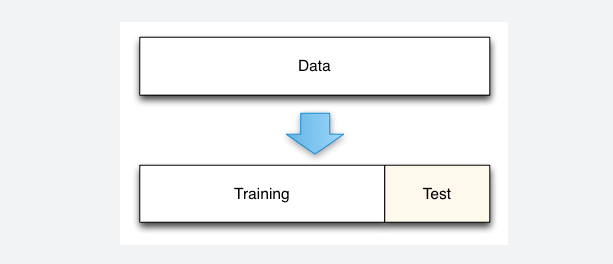

In [ ]:
# Split the X & y data subsets into X_train, X_test, y_train, y_test, where training set makes 70% of data and test set 30 % of data; random state = 2 for repeatablitity
X_train, X_test, y_train, y_test = xxxx_xxxxx_xxxxx(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

In [ ]:
#Print out the sizes of each of X_train, X_test, y_train, y_test
print('X_train size:', X_train.shape)
print('X_test size:', X_test.shape)
print('y_train size:', y_train.shape)
print('y_test size:', y_test.shape)

# Fitting Linear Regression

In [ ]:
# Represent LinearRegression as lr/Creating LinearRegression Object
lr = LinearRegression()
# Fit the model created above to the training data
lr.xxx(X_train, y_train)

In [ ]:
# Print the intercept
print(lr.intercept_)

In [ ]:
# Print the coefficients
coeff_df = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])
print(coeff_df)

In [ ]:
# Making predictions using the model on the test data
y_pred = lr.xxxxxxxxx(X_test)

# Performence Metrics

In [ ]:
#Calculate the mean squared error, root mean squared error and r-squared coefficient on test data
mse = xxxxxxxxxxxxx(y_test, y_pred)
rmse = xxxxxxx(mse)
r_squared = xxxxxxxxx(y_test, y_pred)

In [ ]:
#Print the mean squared error, root mean squared error and r-squared coefficient 
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

In [ ]:
#Plot the Estimated Prices vs Actual Prices (scatterplot)
plt.figure(dpi = 75)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Estimated Pricess")
plt.title("Model: Actual vs Estimated Prices")
plt.show()

In [ ]:
#Residuals plot (residual= actual y-value − predicted y-value) (scatterplot)
plt.figure(dpi = 75)
plt.scatter( y_pred, y_test-y_pred)
plt.plot(y_pred, np.zeros(len(y_test)),color="red")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [ ]:
# Comparing predctions to actual values
res = pd.DataFrame(y_pred, y_test.ravel())
res = res.reset_index()
res.columns = ['Actual Price', 'Predicted Price']
res['Actual Price'] = round(res['Actual Price'], 0)
res['Predicted Price'] = round(res['Predicted Price'], 0)
res['Difference'] = res['Predicted Price'] - res['Actual Price']
res.head(5)

# Additional: Ordinary Least Squares regression (OLS)

In [ ]:
# Renaming data 
X_train_sm = X_train
# Unlike sklearn, statsmodels don't automatically fit a constant, in order to add a constant use sm.add_constant(X) 
X_train_sm = sm.add_constant(X_train_sm)
# Fit the model
lm_1 = sm.XXX(y_train,X_train_sm).fit()

# Print the coefficients
lm_1.params

In [ ]:
# Print summary of the OLS regression model
print(lm_1.summary())

# Using the model

In [ ]:
# The user inputs the data to use for prediction

avg_area_income = int(input("Please enter avergae area income:(e.g. 70000) "))
avg_house_age = int(input("Please enter avergae house age: (e.g. 5)"))
avg_number_of_rooms = int(input("Please enter avergae number of rooms: (e.g. 8)"))
avg_number_of_bedrooms = int(input("Please enter avergae number of bedrooms: (e.g. 4)"))
avg_population = int(input("Please enter avergae population: (e.g. 35000)"))

In [ ]:
# Using user input from above use the original lr model to predict the output:
user_input = [[avg_area_income, avg_house_age, avg_number_of_rooms, avg_number_of_bedrooms, avg_population]]
user_input_std = pd.DataFrame(pre_process.fit_transform(user_input) )
user_input_std = user_input_std.rename(columns={0: 'Avg. Area Income', 1: 'Avg. Area House Age', 2: 'Avg. Area Number of Rooms', 3: 'Avg. Area Number of Bedrooms', 4: 'Area Population'})
prediction = lr.predict(user_input_std)
print('Predicted price of the house: ', round(prediction[0], 0))

#Other models

In [ ]:
# SVR: support vector regression model

from sklearn.svm import SVR
# Fit the model
regressor_svr = SVR(kernel = 'rbf', C = 10000) # radial basis function kernel
regressor_svr.fit(X_train, y_train)
y_pred_svr = regressor_svr.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = sqrt(mse_svr)
r_squared_svr = r2_score(y_test, y_pred_svr)

#Print evaluation metrics
print('Mean_Squared_Error :' ,mse_svr)
print('Root_Mean_Squared_Error :' ,rmse_svr)
print('r_square_value :',r_squared_svr)

In [ ]:
# LightGBM: gradient boosting ensemble method

import lightgbm as lgb
# Fit the model

# Define parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rate': 0.05,
    'metric': {'l2','l1'},
}

# Load data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Fit the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

# Predict on test data
y_pred_lgb = model.predict(X_test)


# Calculate evaluation metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mse**(0.5)
r_squared_lgb = r2_score(y_test, y_pred_lgb)

#Print evaluation metrics
print("MSE: %.2f" % mse_lgb)
print("RMSE: %.2f" % rmse_lgb)
print("R-squared value: %.2f" % r_squared_lgb)

<h1> Model Comparison:</h1>
<br></br>
<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>R^2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>XXXXX</td>
    </tr>
    <tr>
      <td>OLS Linear Regression</td>
      <td>XXXXX</td>
    </tr>
    <tr>
      <td>SVR</td>
      <td>XXXXX</td>
    </tr>
    <tr>
      <td>Lightgbm</td>
      <td>XXXXX</td>
    </tr>
  </tbody>
</table>


